In [0]:
import seaborn as sns
import numpy as np
from scipy.special import expit

In [0]:
x = np.linspace(-5, 5, num=100)

In [0]:
def relog(x, n=10):
  return np.log(x.clip(min=0) + 1/n) / np.log(n) + 1

In [0]:
data = {
    'ReLU': x.clip(min=0),
    'Sigmoid': expit(x),
    'ReLog n=2': relog(x, n=2),
    'ReLog n=10': relog(x, n=10),
    'ReLog n=100': relog(x, n=100),
}

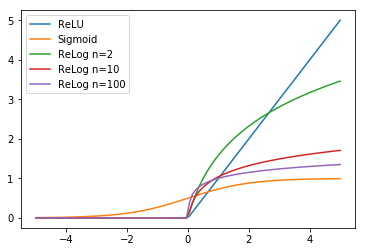

In [0]:
import matplotlib.pyplot as plt
for label, vals in data.items():
    plt.plot(x, vals, label=label)
plt.legend(loc=2)
None